In [6]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

print("Original Shape:", X.shape)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(5)])
print("Reduced Shape:", pca_df.shape)

explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance Ratio:")
for i, ratio in enumerate(explained_variance, start=1):
    print(f"PC{i}: {ratio:.4f}")

print(f"\nTotal Variance Explained by 5 components: {explained_variance.sum():.4f}")

Original Shape: (178, 13)
Reduced Shape: (178, 5)

Explained Variance Ratio:
PC1: 0.3620
PC2: 0.1921
PC3: 0.1112
PC4: 0.0707
PC5: 0.0656

Total Variance Explained by 5 components: 0.8016


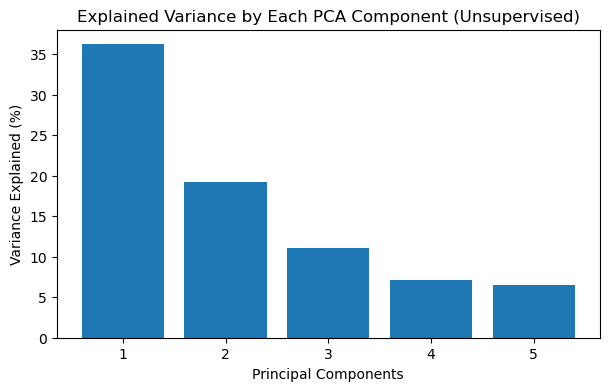

In [7]:
plt.figure(figsize=(7,4))
plt.bar(range(1, 6), explained_variance * 100)
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained (%)')
plt.title('Explained Variance by Each PCA Component (Unsupervised)')
plt.show()

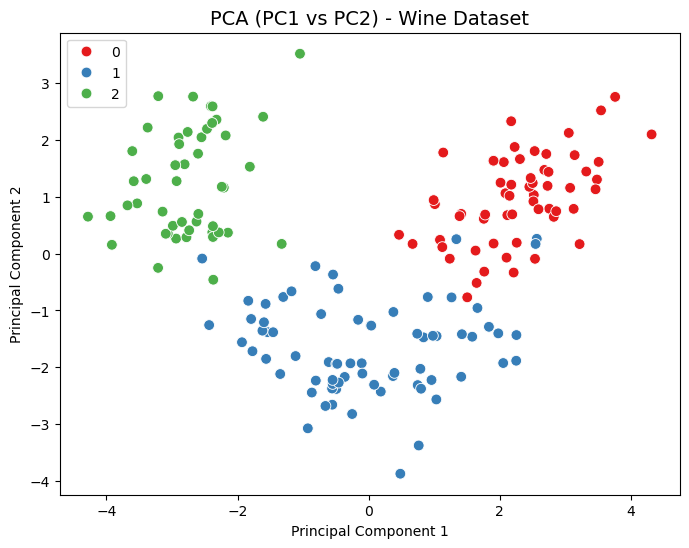

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=pca_df['PC1'], 
    y=pca_df['PC2'],
    hue=y,
    palette='Set1',
    s=60
)
plt.title('PCA (PC1 vs PC2) - Wine Dataset', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()